In [2]:
import sympy as sym
from sympy import symbols
from sympy.plotting import plot, plot_parametric, plot3d_parametric_surface, plot3d_parametric_line, plot3d

import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def cost_functions(vcost,fix_cost,fix_cost_yn=True,var_cost=True):
    var_cost = vcost # assign symbolic function to an expression
    fix_cost = 500
    total_cost = var_cost + fix_cost
    marg_cost = sym.diff(total_cost, x,1)

    avg_var_cost = sym.simplify(var_cost/x)
    avg_fix_cost = sym.simplify(500/x)
    avg_total_cost = avg_var_cost + avg_fix_cost

    avc = sym.plot(avg_var_cost, (x,1,10), show=False)
    afc = sym.plot(avg_fix_cost, (x,1,10), show=False)
    atc = sym.plot(avg_total_cost, (x,1,10), show=False)
    mc = sym.plot(marg_cost, (x,1,10), show=False)

    avc.extend(afc)
    avc.extend(atc)
    avc.extend(mc)
    fig = avc
    return fig
fig = cost_functions(3*(x**0.5)-sym.sin(x),500,True,True)
fig.show()



NameError: name 'x' is not defined

9*x**2 - 4*x


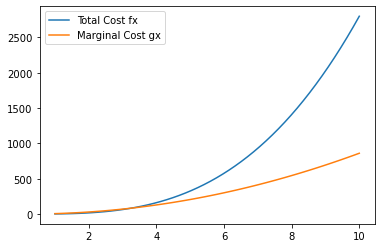

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot


f =  3*x**3 - 2*x**2  # sympy module
g = diff(f,x)
print(g)
fx = lambdify(x, f, modules=['numpy']) # sympy module
gx = lambdify(x, g, modules=['numpy']) # sympy module
xvals = np.linspace(1,10,50)

fig = plt.plot(xvals, fx(xvals), label='Total Cost fx')
plt.plot(xvals, gx(xvals), label='Marginal Cost gx')
plt.legend()
plt.show()


In [ ]:
### WORKING EXAMPLE
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def get_cost_functions(var_cost = '3*x**2-2*x' , fix_cost=0, max_output=10):
    xmax = max_output
    vc = var_cost
    fc = fix_cost
    tc =  vc + "+" + str(fc)  # sympy module
    mc = diff(tc,x)
    #print(tc, mc)
    vc_x = lambdify(x, vc, modules=['numpy']) # sympy module
    tc_x = lambdify(x, tc, modules=['numpy']) # sympy module
    mc_x = lambdify(x, mc, modules=['numpy']) # sympy module

    xvals = np.linspace(1,xmax,50)
    print(xvals)
    trace_avc = go.Scatter(x= xvals, y= vc_x(xvals)/xvals, name='Average Variable Cost (AVC)')
    trace_afc = go.Scatter(x= xvals, y= fc/xvals, name='Average Fixed Cost (AFC)')
    trace_atc = go.Scatter(x= xvals, y= tc_x(xvals)/xvals, name='Average Total Cost (ATC)')
    #trace_tc = go.Scatter(x= xvals, y= tc_x(xvals), name='Total Cost (TC)')
    trace_mc = go.Scatter(x= xvals, y= mc_x(xvals), name='Marginal Cost (MC)')

    cost_layout = go.Layout(
        title = dict(text='Economic Cost functions for {} in Output(x) terms'.format(tc)),
        xaxis=dict(title="Number of Units of Output (x)"),
        yaxis=dict(title="Cost components")
        )
    fig = go.Figure(data=[trace_avc, trace_afc, trace_atc, trace_mc], layout = cost_layout)
    fig.show()
    return fig

